# Guide d'ondes

Notebook implémentant la technique décrite par Maganza et al. pour simuler une clarinette.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [43]:
def f_aux(x):
    if x>=0:
        return 0
    return x**3 - x

def f(delta_p, Pc):
    return f_aux(delta_p/Pc - 1)

f = np.frompyfunc(f, 2, 1)

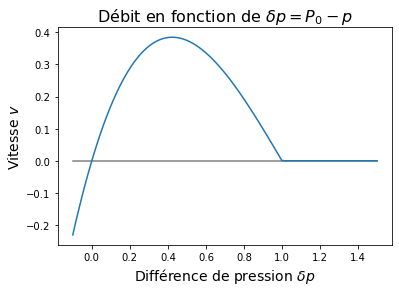

In [71]:
Pc = 1 # Pression de plaquage
P0 = .4 # pression dans la bouche du musicien
rho = 1.2 # masse volumique de l'air (kg/m^3)
c = 340 # vitesse du son (m/s)
r = 0.025 # rayon du résonateur (m)
S = np.pi*r**2 # section du résonateur (m^2)
Zc = rho*c/S # impédance caractéristique de l'air (kg/(m^2.s))
Zs = rho*c # impédance caractéristique spécifique de l'air (kg/(m^2.s))

delta_p = np.linspace(-.1, Pc+.5, 100) # p ne peut a priori pas dépasser P0
# cela donnerait un débit négatif, ce qui est en pratique jamais observé

p = P0 - delta_p
v = f(delta_p, Pc)
# delta_p = P0 - p

plt.figure()
plt.title("Débit en fonction de $\delta p = P_0 - p$", fontsize=16)
plt.xlabel("Différence de pression $\delta p$", fontsize=14)
plt.ylabel("Vitesse $v$", fontsize=14)
plt.plot([delta_p[0], delta_p[-1]], [0, 0], alpha=0.5, color="black")
plt.plot(delta_p, v)

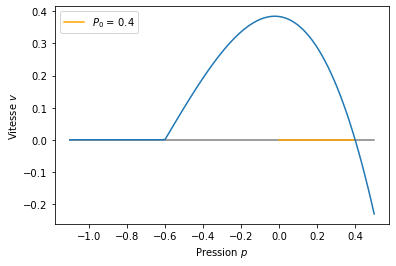

In [72]:
plt.plot([p[0], p[-1]], [0, 0], alpha=0.5, color="black")
plt.plot([0, P0], [0, 0], alpha=1, color="orange", label=f"$P_0$ = {P0}")
plt.plot(p, v)
plt.xlabel("Pression $p$")
plt.ylabel("Vitesse $v$")
plt.legend()

$$u = f(p, P_0)$$
$$u = Z_c^{-1} (p^+ - p^-)$$
$$p^\pm(t) = \frac{1}{2} (p(t) \pm Z_c u(t))$$


$$p = p^+ + p^-$$
$$p^+ = p - p^-$$

p^

$$p^+ =  Z_c u + p^- $$
$$p^+ =  Z_c f(p, P_0) + p^- $$

Text(0, 0.5, 'Pression $p^+$')

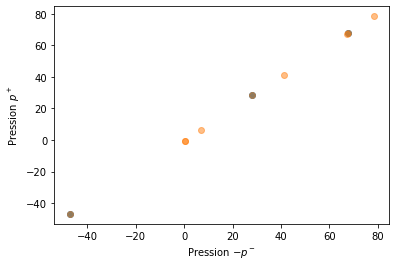

In [67]:
p_p = 1/2 * (p + Zs*v)
p_m = 1/2 * (p - Zs*v)
p2 = p_p + p_m
u2 = (p_p - p_m)/Zs

plt.figure()
# plt.title("Débit en fonction de la pression", fontsize=16)
# plt.
plt.scatter(-p_m[:3], p_p[:3], label="")
plt.scatter(-p_m[:-1], p_p[:-1], label="", alpha=0.5)
plt.xlabel("Pression $-p^-$")
plt.ylabel("Pression $p^+$")
# plt.scatter(-p_m, p)

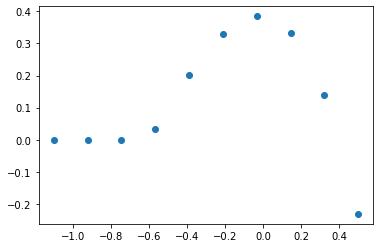

In [68]:
plt.scatter(p2, u2)